In [36]:
use HPRICE3.DTA, clear

In [37]:
ds

year     nbh      linst    area     dist     y81      linstsq
age      cbd      price    land     ldist    larea
agesq    inst     rooms    baths    lprice   lland


# drop obs with year = 1981

In [38]:
tabstat year, stat(min max)


    variable |       min       max
-------------+--------------------
        year |      1978      1981
----------------------------------


In [39]:
drop if year == 1981

(142 observations deleted)


In [40]:
tabstat year, stat(min max)


    variable |       min       max
-------------+--------------------
        year |      1978      1978
----------------------------------


# (a)

In [41]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        year |        179        1978           0       1978       1978
         age |        179     21.2067    37.80831          0        189
       agesq |        179    1871.207    6063.715          0      35721
         nbh |        179    2.402235    2.126662          0          6
         cbd |        179    16424.58    9411.245       1000      35000
-------------+---------------------------------------------------------
        inst |        179    17128.49    9425.654       1000      34000
       linst |        179    9.504069    .8223241     6.9078     10.434
       price |        179    76628.04    30626.44      26000     300000
       rooms |        179    6.581006    .9586256          4         10
        area |        179    1999.637    635.0077        750       5078
-------------+-------------------------------------------------

In [42]:
tabstat lprice rooms baths larea lland age agesq, stat(n mean sd min max skew kurt) long format



   stats |    lprice     rooms     baths     larea     lland       age     agesq
---------+----------------------------------------------------------------------
       N |       179       179       179       179       179       179       179
    mean |  11.17908  6.581006  2.307263  7.550936  10.32008   21.2067  1871.207
      sd |  .3669739  .9586256  .7423791  .3205713  .8623176  37.80831  6063.715
     min |  10.16585         4         1  6.620073  7.444249         0         0
     max |  12.61154        10         4  8.532673  13.20762       189     35721
skewness | -.0064139   .190436 -.3940904 -.2549354 -.4610361  2.851244  4.398906
kurtosis |  3.704527  4.382465  2.176377  3.073325  3.737946  11.41462  22.26696
--------------------------------------------------------------------------------


# (c)

In [43]:
gen lcbd = log(cbd)

In [44]:
reg lprice rooms baths larea lland age agesq lcbd


      Source |       SS           df       MS      Number of obs   =       179
-------------+----------------------------------   F(7, 171)       =     51.59
       Model |  16.2680474         7  2.32400677   Prob > F        =    0.0000
    Residual |  7.70318772       171  .045047881   R-squared       =    0.6786
-------------+----------------------------------   Adj R-squared   =    0.6655
       Total |  23.9712351       178   .13466986   Root MSE        =    .21224

------------------------------------------------------------------------------
      lprice |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       rooms |   .0620117   .0222711     2.78   0.006       .01805    .1059734
       baths |   .0659059   .0376178     1.75   0.082    -.0083491    .1401609
       larea |   .3796112    .073453     5.17   0.000     .2346199    .5246026
       lland |    .106066   .0328237     3.23   0.

In [45]:
display "percentage change :", 100*(exp(_b[baths])-1)
display "ratio of percentage change to orignial value * 100:", ( 100* (exp(_b[baths])-1))/ (100*_b[baths])


percentage change : 6.8126206

ratio of percentage change to orignial value * 100: 1.033689


# (d)

In [46]:
*save the se from regression table as a scalar
scalar se_lland = _se[lland]
*find the correct cutoff point from T-distribution
scalar t_cutoff = invttail(e(df_r), 0.025)
*compute the 99% CI for beta_room
scalar ci_upper = _b[lland] + se_lland * t_cutoff
scalar ci_lower = _b[lland] - se_lland * t_cutoff

display "the upper bound is ", ci_upper
display "the lower bound is ", ci_lower

*or, just list all scalars
scalar list






the upper bound is  .17085779

the lower bound is  .04127419

   p_value =  .04467221
   t_value = -1.7085734
  ci_lower =  .04127419
  ci_upper =  .17085779
  t_cutoff =   1.973934
  se_lland =  .03282369


# (e)

In [47]:
*compute t value
scalar t_value = (_b[lcbd]-0)/_se[lcbd]
scalar p_value = 1 - ttail(e(df_r), t_value)
display "the t value is ", t_value
display "the left-tail p-value is ", p_value

if p_value > 0.1 {
        display "fail to reject H0 since p value is larger than sig level" 
        }
else {
    display "reject H0 since p value is smaller than significant level"
    }




the t value is  -1.7085734

the left-tail p-value is  .04467221


reject H0 since p value is smaller than significant level


# (f)






the minimum local is at age =  114.07553


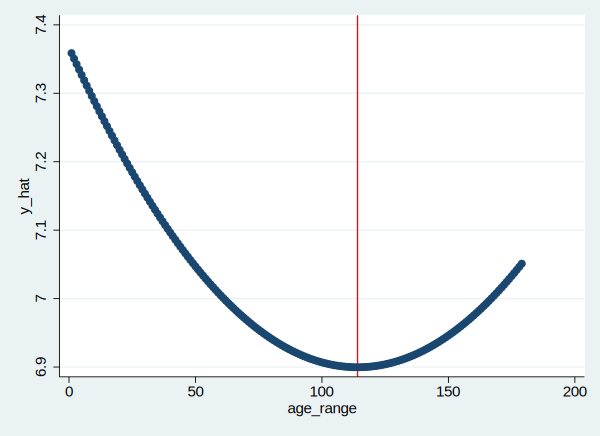

In [48]:
quietly reg lprice rooms baths larea lland age agesq lcbd

gen age_range  = _n
gen agesq_range = age_range^2

gen y_hat = _b[_cons] + _b[age] * age_range + _b[agesq] * agesq_range

display "the minimum local is at age = ", -1 * _b[age]/(2*_b[agesq])

scatter y_hat age_range, xline(114.07553, lcolor(red))

# (g)

In [59]:
quietly reg lprice rooms baths larea lland age agesq lcbd
test age==agesq==0




 ( 1)  age - agesq = 0
 ( 2)  age = 0

       F(  2,   171) =   14.84
            Prob > F =    0.0000


# (h)

In [60]:
hettest


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of lprice

         chi2(1)      =     2.54
         Prob > chi2  =   0.1107


# (i)

In [50]:
ssc install estout, replace

checking estout consistency and verifying not already installed...
all files already exist and are up to date.


In [62]:
quietly reg lprice rooms baths larea lland age agesq lcbd
estimate store m1, title(with)
quietly reg lprice rooms baths larea lland age agesq
estimate store m2, title(without)

In [63]:
estout m1 m2, cells(b(star) se(par)) stats(N r2 r2_a aic bic vce)


--------------------------------------------
                       m1              m2   
                     b/se            b/se   
--------------------------------------------
rooms            .0620117**      .0576318*  
               (.0222711)      (.0222461)   
baths            .0659059        .0735335   
               (.0376178)      (.0375597)   
larea            .3796112***     .3890712***
                (.073453)      (.0736515)   
lland             .106066**      .0701687** 
               (.0328237)      (.0253588)   
age             -.0081903***    -.0066653***
                (.001941)      (.0017332)   
agesq            .0000359**      .0000279** 
               (.0000112)      (.0000103)   
lcbd            -.0637607                   
               (.0373181)                   
_cons            7.366848***      7.05724***
               (.5573329)      (.5299841)   
--------------------------------------------
N                     179             179   
r2       

# (j)

In [64]:
gen area_rooms = larea * rooms

In [65]:
reg lprice rooms baths larea lland age agesq lcbd area_rooms
estimate store m3, title(new)



      Source |       SS           df       MS      Number of obs   =       179
-------------+----------------------------------   F(8, 170)       =     49.13
       Model |  16.7337087         8  2.09171358   Prob > F        =    0.0000
    Residual |  7.23752647       170  .042573685   R-squared       =    0.6981
-------------+----------------------------------   Adj R-squared   =    0.6839
       Total |  23.9712351       178   .13466986   Root MSE        =    .20633

------------------------------------------------------------------------------
      lprice |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       rooms |  -.9504368   .3068965    -3.10   0.002    -1.556256    -.344618
       baths |   .0538673   .0367509     1.47   0.145    -.0186795    .1264141
       larea |    -.47584   .2683365    -1.77   0.078    -1.005541    .0538607
       lland |   .1005348   .0319534     3.15   0

In [66]:
estout m1 m2 m3, cells(b(star) se(par)) stats(N r2 r2_a aic bic vce)


------------------------------------------------------------
                       m1              m2              m3   
                     b/se            b/se            b/se   
------------------------------------------------------------
rooms            .0620117**      .0576318*      -.9504368** 
               (.0222711)      (.0222461)      (.3068965)   
baths            .0659059        .0735335        .0538673   
               (.0376178)      (.0375597)      (.0367509)   
larea            .3796112***     .3890712***      -.47584   
                (.073453)      (.0736515)      (.2683365)   
lland             .106066**      .0701687**      .1005348** 
               (.0328237)      (.0253588)      (.0319534)   
age             -.0081903***    -.0066653***    -.0079618***
                (.001941)      (.0017332)      (.0018882)   
agesq            .0000359**      .0000279**      .0000314** 
               (.0000112)      (.0000103)       (.000011)   
lcbd            -.06376

In [67]:
!rm -rf Stata_21S2.html
!jupyter nbconvert --to html Stata_21S2.ipynb





[NbConvertApp] Converting notebook Stata_21S2.ipynb to html
[NbConvertApp] Writing 623162 bytes to Stata_21S2.html
